# Support Vector Machine
### Luis Chunga

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from nltk.corpus import wordnet as wn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk import pos_tag
import pandas as pd
import time


In [13]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/luis/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
start_time = time.time()
# Add the Data using pandas
Corpus = pd.read_csv("input/Nausheen.csv",encoding='latin')
Corpus

,tweets,category
0,Some of the most beautiful women your eyes wil...,2
1,Of course #notall Muslims are taught all of th...,2
2,Why is JoeBiden's Director of Jewish Outreach ...,1
3,On a Muslim dating app and I asked a guy what ...,2
4,"Haha thatâs why muslim smell like shit, stop...",2
...,...,...
908,'@fjspti We are talking about Pakistan not US ...,0
909,'From US to UK Kandahar to Kabul Delhi to Mu...,0
910,'Replug: For @Reuters on how families of thos...,0
911,News in brief: #smes #UKTI #CBI #Pakistan #glo...,0


In [3]:
### The dataset has 2 class, which 0 is Email and 1 is spam 
### There are 2033 unique email out of 2087 
### There are 1356 unique spam out of 1360 

Corpus.groupby('category').describe()

tweets                                                               
          count unique                                                top freq
category                                                                      
0           417    414  What an embarrassment to the Congress and the ...    2
1           104    102  Ramy' becomes first Muslim American sitcom to ...    3
2           139    138  Muslims are the ones who invented the slave tr...    2
3           253    252  There can never be peace wherever there is Islam.    2

Text(0.5, 1.0, 'Number of Tweets')

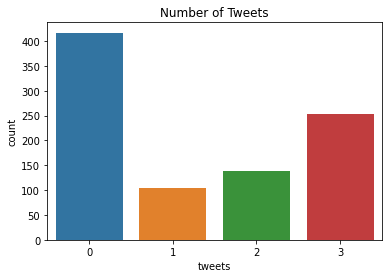

In [4]:
# Display
sns.countplot(Corpus.category)
plt.xlabel('tweets')
plt.title('Number of Tweets')

In [9]:
# Initializing WordNetLemmatizer()
word_Lemmatized = WordNetLemmatizer()

In [10]:

# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. 
# By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

In [11]:
#In this each entry in the corpus will be broken into set of words
Corpus['tweets']= [word_tokenize(str(entry)) for entry in Corpus['tweets']]

In [14]:
# IT lematize the corpus and convert the tokenize word to a list of string 
# Removing number

for index,entry in enumerate(Corpus['tweets']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
   
    # pos_tag function below will provide the 'tag' 
    # if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
        Final_words.append(word_Final)
    
    Corpus.loc[index,'tweets'] = str(Final_words)


In [15]:
Corpus

,tweets,category
0,"['Some', 'of', 'the', 'most', 'beautiful', 'wo...",2
1,"['Of', 'course', '#', 'notall', 'Muslims', 'be...",2
2,"['Why', 'be', 'JoeBiden', ""'s"", 'Director', 'o...",1
3,"['On', 'a', 'Muslim', 'dating', 'app', 'and', ...",2
4,"['Haha', 'thatâ\x80\x99s', 'why', 'muslim', 's...",2
...,...,...
908,"[""'"", '@', 'fjspti', 'We', 'be', 'talk', 'abou...",0
909,"[""'From"", 'US', 'to', 'UK', 'Kandahar', 'to', ...",0
910,"[""'Replug"", ':', 'For', '@', 'Reuters', 'on', ...",0
911,"['News', 'in', 'brief', ':', '#', 'smes', '#',...",0


##### Splitting 80% for training and 20% for testing

In [17]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(Corpus['tweets'],
                                                                    Corpus['category'],
                                                                    test_size=0.3,
                                                                    random_state=20)

In [18]:
Tfidf_vect = TfidfVectorizer(max_features=1000)


In [19]:
# Vectorize the words by using TF-IDF Vectorizer - 
# This is done to find how important a word in document is in comaprison to the corpus
Tfidf_vect = TfidfVectorizer(max_features=1000)
Tfidf_vect.fit(Corpus['tweets'])

#term frequency–inverse document frequencyTForm
X_train_Tfidf = Tfidf_vect.transform(X_train)
X_test_Tfidf = Tfidf_vect.transform(X_test)

In [20]:
# classifies data 
lr = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state=20, verbose=True).fit(X_train_Tfidf, Y_train)
yhat = lr.predict(X_test_Tfidf)

# the 3 lines below show how to invoke various output    
print("\n","-> Accuracy",accuracy_score(Y_test, yhat))
print("\n"," -> Classification Report\n",classification_report(Y_test, yhat),sep="")
print("\n","-> Classification Report\n",confusion_matrix(Y_test, yhat),sep="")

[LibSVM]
 -> Accuracy 0.6532846715328468

 -> Classification Report
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       119
           1       0.67      0.28      0.39        36
           2       0.38      0.12      0.19        41
           3       0.56      0.76      0.64        78

    accuracy                           0.65       274
   macro avg       0.59      0.51      0.51       274
weighted avg       0.63      0.65      0.61       274


-> Classification Report
[[105   3   1  10]
 [ 11  10   3  12]
 [ 12   0   5  24]
 [ 13   2   4  59]]


In [21]:
print("{:.2f} seconds".format(time.time() - start_time))

269.81 seconds


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

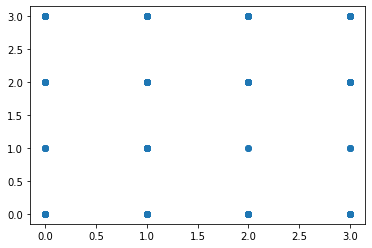

In [22]:


# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Make cross validated predictions
predictions = cross_val_predict(lr, X_train_Tfidf, Y_train, cv=6)
plt.scatter(Y_train, predictions)

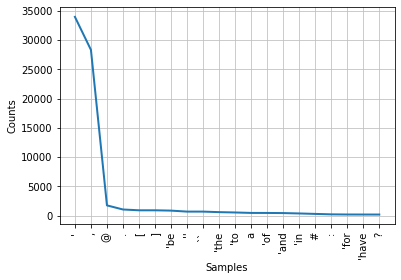

In [24]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
tokenized_word=[]
fdist = FreqDist()
for i in Corpus.tweets:
  
    for word in word_tokenize(i):
        fdist[word] += 1
        
fdist.plot(20,cumulative=False)
plt.show()